In [51]:
# Horray libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
'''data_dir = tf.keras.utils.get_file('touch_photos', origin=google_path, untar=True)
data_dir = pathlib.Path(data_dir)'''

In [49]:
# Load data from csv
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Unpack dataframe to list
image = train_df['image'].tolist()
label = train_df['label'].tolist()
train_list = []
train_list.append(image)
train_list.append(label)

image = test_df['image'].tolist()
label = test_df['label'].tolist()
test_list = []
test_list.append(image)
test_list.append(label)

In [ ]:
# Transfer learning using Tensorflow

In [55]:
validation_dir = '_data/_bylabel/_train'
BATCH_SIZE = 32
IMG_SIZE = (180, 180)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 3336 files belonging to 2 classes.


In [62]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

NameError: name 'train_dataset' is not defined

<Figure size 720x720 with 0 Axes>

In [33]:
# PROTOTYPE
train = tf.keras.preprocessing.image_dataset_from_directory(
    'processed/train', 
    batch_size=32, 
    image_size=(64, 64), 
    shuffle=True, 
    validation_split=None,
)
test = tf.keras.preprocessing.image_dataset_from_directory(
    'processed/test', 
    batch_size=32, 
    image_size=(64, 64), 
    shuffle=False, 
    validation_split=None,
)
model.fit(
  train,
  validation_data=test,
  epochs=epochs
)
test_preds = model.predict(test)
test_preds.to_csv(ideally with image names, definately with the actual labels)
train_preds = model.predict(train)
train_preds.to_csv(ideally with image names, definately with the actual labels)

SyntaxError: invalid syntax (<ipython-input-33-89f568a72014>, line 21)

In [ ]:
# Image classification using TensorFlow

In [34]:
batch_size = 32
img_height = 180
img_width = 180

In [53]:
path = '_data/_bylabel/_train'
data_dir = path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3336 files belonging to 2 classes.
Using 2669 files for training.


In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3336 files belonging to 2 classes.
Using 667 files for validation.


In [60]:
class_names = train_ds.class_names
print(class_names)

['0', '1']


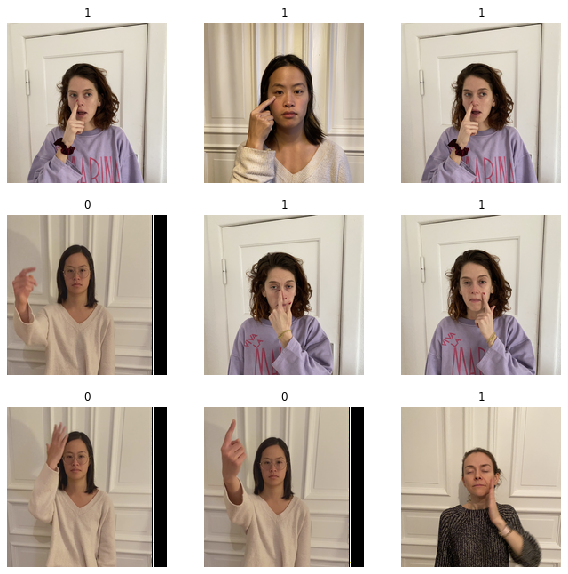

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [42]:
# Model building
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [45]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
84/84 [==============================] - 21s 247ms/step - loss: 0.1157 - accuracy: 0.9595 - val_loss: 2.0214e-07 - val_accuracy: 1.0000
Epoch 2/10
84/84 [==============================] - 20s 235ms/step - loss: 1.2050e-07 - accuracy: 1.0000 - val_loss: 1.2153e-07 - val_accuracy: 1.0000
Epoch 3/10
84/84 [==============================] - 20s 236ms/step - loss: 7.5885e-08 - accuracy: 1.0000 - val_loss: 8.0783e-08 - val_accuracy: 1.0000
Epoch 4/10
84/84 [==============================] - 20s 235ms/step - loss: 5.3776e-08 - accuracy: 1.0000 - val_loss: 6.1839e-08 - val_accuracy: 1.0000
Epoch 5/10
84/84 [==============================] - 20s 235ms/step - loss: 4.2788e-08 - accuracy: 1.0000 - val_loss: 4.9149e-08 - val_accuracy: 1.0000
Epoch 6/10
84/84 [==============================] - 20s 236ms/step - loss: 3.6401e-08 - accuracy: 1.0000 - val_loss: 4.1822e-08 - val_accuracy: 1.0000
Epoch 7/10
84/84 [==============================] - 20s 236ms/step - loss: 3.2248e-08 - accuracy: 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
validation_dataset = train

val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

AttributeError: 'DataFrame' object has no attribute '_variant_tensor'

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)